# 二叉树中所有距离为 K 的结点

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/all-nodes-distance-k-in-binary-tree/**

## 一、题目

给定一个二叉树（具有根结点 root）， 一个目标结点 target ，和一个整数值 K 。

返回到目标结点 target 距离为 K 的所有结点的值的列表。 答案可以以任何顺序返回。

### 提示：

- 给定的树是非空的。
- 树上的每个结点都具有唯一的值 0 <= node.val <= 500 。
- 目标结点 target 是树上的结点。
0 <= K <= 1000.

## 二、示例

输入：root = [3,5,1,6,2,0,8,null,null,7,4], target = 5, K = 2

输出：[7,4,1]

解释：

所求结点为与目标结点（值为 5）距离为 2 的结点，值分别为 7，4，以及 1。注意，输入的 "root" 和 "target" 实际上是树上的结点。上面的输入仅仅是对这些对象进行了序列化描述。

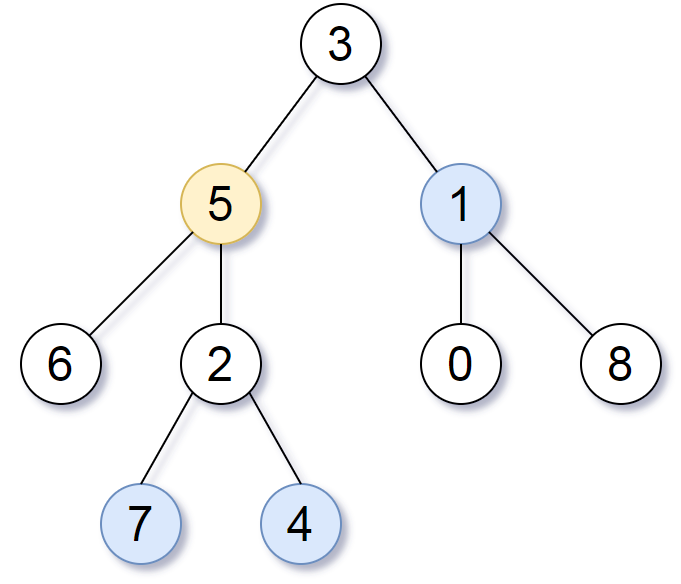

## 三、解题思路

In [1]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
root = TreeNode(3)

target = TreeNode(5)

root.left = target
root.right = TreeNode(1)

root.left.left = TreeNode(6)
root.left.right = TreeNode(2)

root.right.left = TreeNode(0)
root.right.right = TreeNode(8)

root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

### 从target及其祖先深搜

In [2]:
def distanceK(root: TreeNode, target: TreeNode, K: int):
    def dfs(node, step, exclude, ret):
        if not node:
            return
        if node in exclude:
            return
        if step == 0:
            ret.append(node.val)
        dfs(node.left, step - 1, exclude, ret)
        dfs(node.right, step - 1, exclude, ret)
    def getAncestors(node, item, ret):
        if not node:
            return
        if node == target:
            for n in item:
                ret.extend(item[:])
            return
        item.append(node)
        getAncestors(node.left, item, ret)
        getAncestors(node.right, item, ret)
        item.pop()
    ancestors = []
    getAncestors(root, [], ancestors)
    ancestors.append(target)
    ancestorsCount = len(ancestors)
    ret = []
    for i in range(ancestorsCount):
        index = ancestorsCount - 1 - i
        ancestor = ancestors[index]
        dfs(ancestor, K - i, set(ancestors[index+1:]), ret)
    return ret

In [3]:
distanceK(root, target, 2)

[7, 4, 1]